Text(0.5, 0, 'Displacement')

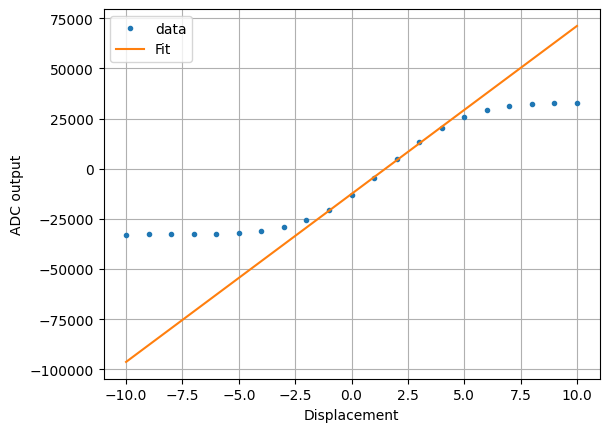

In [1]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
import kontrol

# # Commented below is how the data was generated
# x = np.linspace(-10, 10, 21)
# x0 = 1.5
# y0 = 1
# a = 32768
# m = 0.25
# y = a*scipy.special.erf(m*(x-x0)) + y0
# #

# There's the data we obtained by measurement.
displacement = [-10., -9, -8, -7, -6, -5, -4, -3,
                -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]  # millimeters
output = [-32765., -32760, -32741, -32680, -32504, -32060,
          -31068, -29109, -25691, -20421, -13241, -4596, 4598,
          13243, 20423, 25693, 29111, 31070, 32062, 32506, 32682]

# This method firstly fits the 3 data cloest to the middle of the full range
# with a straight line
# and keeps adding data to the set within a certain non-linearity (5% by default)
# compared to the fitted line.
# The new data set is then fitted and the process terminates when
# no more data points can be added.
slope, intercept = kontrol.sensact.calibrate(displacement, output)

# This commented method fits the data to with an error function erf().
# Particularly Useful for optical displacement sensors.
# slope, intercept = kontrol.sensact.calibrate(displacement, output, method="erf")

fit = slope*np.array(displacement) + intercept

plt.plot(displacement, output, ".", label="data")
plt.plot(displacement, fit, label="Fit")
plt.legend(loc=0)
plt.grid(which="both")
plt.ylabel("ADC output")
plt.xlabel("Displacement")

In [2]:
# The slope has a unit of of ADC count per Displacement unit.
# The inverse of the slope converts the ADC output to displacement.
# Hence, the calibration factor is
print(f"Calibration factor: {1/slope*1000} microns per [ADC count]")

Calibration factor: 0.11950858191559763 microns per [ADC count]
